In [1]:
import pandas as pd
import os

Task 1: Merge 12 months of sale data in a single file

In [2]:
sales=pd.read_csv(r"C:\Users\PRATHAMESH MANDIYE\Downloads\Sales analysis\Sales_September_2019.csv")
files=[file for file in os.listdir(r"C:\Users\PRATHAMESH MANDIYE\Downloads\Sales analysis")]#list comprehension to access all the files
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("C:/Users/PRATHAMESH MANDIYE/Downloads/Sales analysis/"+file)
    #print(file)->gives us all the files in a directory
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv",index=False)

In [3]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Task 2:Add month column

Data Cleaning

In [4]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data=all_data.dropna(how='all')

In [5]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
#all_data['Order ID']=pd.to_numeric(all_data['Order ID'])

In [6]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')


Best Month for sale

Add A sales columns

In [7]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [8]:
results=all_data.groupby('Month').sum()

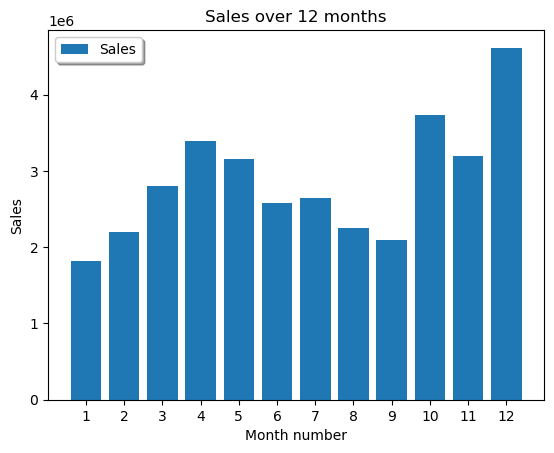

In [9]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month number')
plt.title("Sales over 12 months")
plt.legend(['Sales'],shadow='True')

plt.show()

Which city sold the most?

In [10]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:f"{x.split(',')[1]}({get_state(x)})")#applies to all data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [11]:
result=all_data.groupby('City').sum()
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta(GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin(TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston(MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas(TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles(CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City(NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland(ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland(OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco(CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


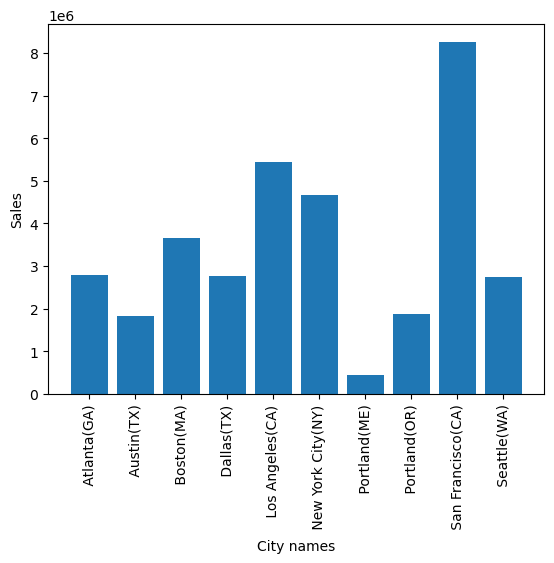

In [12]:
months=all_data['City'].unique()
cities=[city for city,df in all_data.groupby('City') ]
plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('City names')
plt.show()

In [13]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

C:\Users\PRATHAMESH MANDIYE\AppData\Local\Temp\ipykernel_2260\4084940792.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']=pd.to_datetime(all_data['Order Date'])


In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


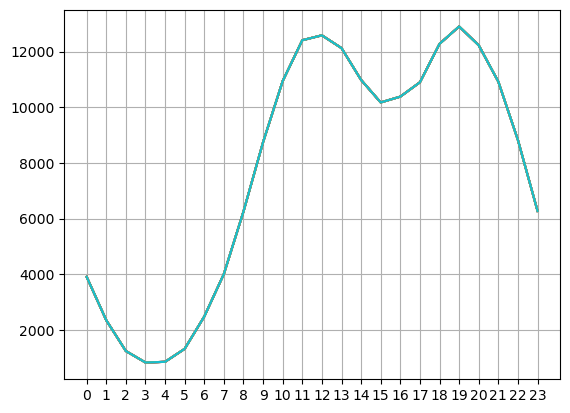

In [15]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
all_data.groupby(['Hour']).count()

Items brought together

In [16]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(100)

C:\Users\PRATHAMESH MANDIYE\AppData\Local\Temp\ipykernel_2260\2966402201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [17]:
from itertools import combinations
from collections import Counter
count =Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))#2 is the tw way combination
for key,value in count.most_common():
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

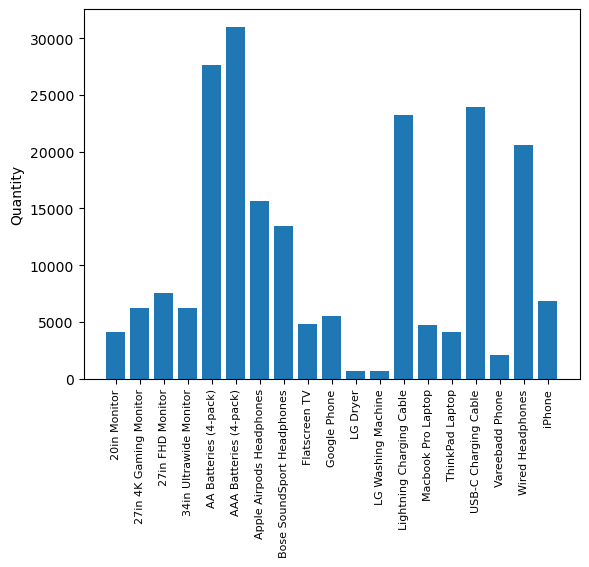

In [29]:
new_group=all_data.drop('Order Date',axis=1)
product_group= new_group.groupby('Product')
q_ordered = product_group.sum()['Quantity Ordered']
products=[product for product,df in product_group]
plt.bar(products,q_ordered)
plt.ylabel("Quantity")
plt.xticks(products,rotation='vertical',size=8)
plt.show()


In [53]:
data_numeric=all_data.select_dtypes(['number'])
data_numeric
print(new_group.groupby('Product').sum()['Price Each'])

Product
20in Monitor                   451068.99
27in 4K Gaming Monitor        2429637.70
27in FHD Monitor              1125974.93
34in Ultrawide Monitor        2348718.19
AA Batteries (4-pack)           79015.68
AAA Batteries (4-pack)          61716.59
Apple Airpods Headphones      2332350.00
Bose SoundSport Headphones    1332366.75
Flatscreen TV                 1440000.00
Google Phone                  3315000.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       323787.10
Macbook Pro Laptop            8030800.00
ThinkPad Laptop               4127958.72
USB-C Charging Cable           261740.85
Vareebadd Phone                826000.00
Wired Headphones               226395.18
iPhone                        4789400.00
Name: Price Each, dtype: float64


In [47]:
prices=data_numeric.mean()['Price Each']
print(prices)

184.39973476741056
